In [24]:
# importing dependencies

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [25]:
# data collection and data processing...

sonar_data= pd.read_csv('sonar data.csv',header=None)

In [26]:
# this head function shows the first 5 rows of the data set...

sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [27]:
# this gives how many rows and columns are in our data

sonar_data.shape

(208, 61)

In [28]:
# this gives the mean, standard deviation and other parameters of our data

sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [29]:
# this gives the counts in numbers

sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [30]:
sonar_data.groupby(60)

In [31]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [32]:
# seperating labels and data

x = sonar_data.drop(columns=60,axis=1)
y = sonar_data[60]

In [33]:
print(x)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [34]:
print(y)

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object


In [35]:
# training and test

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=1)

In [36]:
print(x.shape, x_train.shape, x_test.shape)

(208, 60) (145, 60) (63, 60)


In [37]:
print(x_train)
print(y_train)

         0       1       2       3       4       5       6       7       8   \
29   0.0189  0.0308  0.0197  0.0622  0.0080  0.0789  0.1440  0.1451  0.1789   
14   0.0124  0.0433  0.0604  0.0449  0.0597  0.0355  0.0531  0.0343  0.1052   
188  0.0089  0.0274  0.0248  0.0237  0.0224  0.0845  0.1488  0.1224  0.1569   
132  0.0968  0.0821  0.0629  0.0608  0.0617  0.1207  0.0944  0.4223  0.5744   
35   0.0206  0.0132  0.0533  0.0569  0.0647  0.1432  0.1344  0.2041  0.1571   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8    0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
40   0.0068  0.0232  0.0513  0.0444  0.0249  0.0637  0.0422  0.1130  0.1911   

         9   ...      50      51      52      53   

In [38]:
model = LogisticRegression()

In [39]:
model.fit(x_train, y_train)

LogisticRegression()

In [40]:
# checking

training_prediction = model.predict(x_train)
training_accuracy = accuracy_score(training_prediction, y_train)

In [41]:
print('The score is about:',training_accuracy)

The score is about: 0.8413793103448276


In [42]:
test_prediction = model.predict(x_test)
test_accuracy = accuracy_score(test_prediction, y_test)

In [43]:
print('The score is about:',test_accuracy)

The score is about: 0.6666666666666666


In [44]:
input_data = (0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,0.1786,0.0658,0.0513,0.3752,0.5419,0.5440,
              0.5150,0.4262,0.2024,0.4233,0.7723,0.9735,0.9390,0.5559,0.5268,0.6826,0.5713,0.5429,0.2177,0.2149,0.5811,0.6323,
              0.2965,0.1873,0.2969,0.5163,0.6153,0.4283,0.5479,0.6133,0.5017,0.2377,0.1957,0.1749,0.1304,0.0597,0.1124,0.1047,
              0.0507,0.0159,0.0195,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103)

input_to_numpy = np.asarray(input_data)

input_data_reshape = input_to_numpy.reshape(1,-1)

prediction = model.predict(input_data_reshape)

print(prediction)

if (prediction[0]=='R'):
    print('The object is a Rock')
else:
    print('The object is a Mine')

['R']
The object is a Rock


In [45]:
input_data = (0.0163,0.0198,0.0202,0.0386,0.0752,0.1444,0.1487,0.1484,0.2442,0.2822,0.3691,0.3750,0.3927,0.3308,0.1085,0.1139,
              0.3446,0.5441,0.6470,0.7276,0.7894,0.8264,0.8697,0.7836,0.7140,0.5698,0.2908,0.4636,0.6409,0.7405,0.8069,0.8420,
              1.0000,0.9536,0.6755,0.3905,0.1249,0.3629,0.6356,0.8116,0.7664,0.5417,0.2614,0.1723,0.2814,0.2764,0.1985,0.1502,
              0.1219,0.0493,0.0027,0.0077,0.0026,0.0031,0.0083,0.0020,0.0084,0.0108,0.0083,0.0033)

input_to_numpy = np.asarray(input_data)

input_data_reshape = input_to_numpy.reshape(1,-1)

prediction = model.predict(input_data_reshape)

print(prediction)

if (prediction=='R'):
    print('The object is a Rock')
else:
    print('The object is a Mine')

['M']
The object is a Mine


In [47]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state=0)

In [48]:
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [49]:
prediction = clf_entropy.predict(x_test)

In [50]:
print(prediction)

['R' 'R' 'M' 'R' 'M' 'M' 'R' 'M' 'M' 'M' 'M' 'R' 'M' 'M' 'M' 'M' 'M' 'R'
 'M' 'R' 'R' 'R' 'M' 'R' 'R' 'R' 'R' 'M' 'M' 'R' 'R' 'R' 'R' 'M' 'M' 'R'
 'M' 'R' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'R' 'M'
 'M' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M']


In [51]:
print(confusion_matrix(y_test, prediction))

[[24 10]
 [ 6 23]]


In [59]:
Total_accuracy_score=(accuracy_score(y_test,prediction))

In [60]:
Total_accuracy_score

0.746031746031746

In [53]:
from matplotlib import pyplot as plt

In [54]:
text_representation = tree.export_text(clf_entropy)

In [55]:
print(text_representation)

|--- feature_10 <= 0.17
|   |--- feature_48 <= 0.04
|   |   |--- class: R
|   |--- feature_48 >  0.04
|   |   |--- feature_8 <= 0.11
|   |   |   |--- feature_59 <= 0.01
|   |   |   |   |--- feature_29 <= 0.25
|   |   |   |   |   |--- class: R
|   |   |   |   |--- feature_29 >  0.25
|   |   |   |   |   |--- class: M
|   |   |   |--- feature_59 >  0.01
|   |   |   |   |--- class: R
|   |   |--- feature_8 >  0.11
|   |   |   |--- class: M
|--- feature_10 >  0.17
|   |--- feature_44 <= 0.26
|   |   |--- feature_35 <= 0.45
|   |   |   |--- feature_51 <= 0.01
|   |   |   |   |--- feature_22 <= 0.69
|   |   |   |   |   |--- class: R
|   |   |   |   |--- feature_22 >  0.69
|   |   |   |   |   |--- feature_45 <= 0.05
|   |   |   |   |   |   |--- class: R
|   |   |   |   |   |--- feature_45 >  0.05
|   |   |   |   |   |   |--- class: M
|   |   |   |--- feature_51 >  0.01
|   |   |   |   |--- feature_47 <= 0.04
|   |   |   |   |   |--- feature_1 <= 0.02
|   |   |   |   |   |   |--- class: R
|   |

In [64]:
fig = plt.figure(figsize=(70,50))

<Figure size 7000x5000 with 0 Axes>

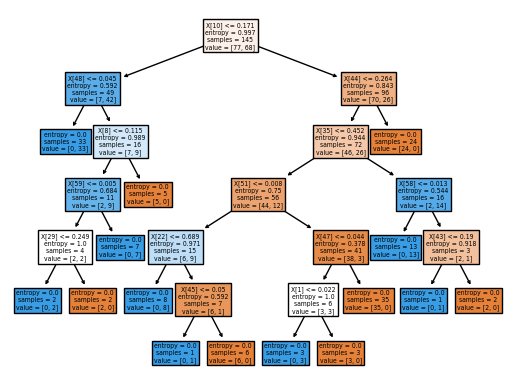

In [65]:
gg = tree.plot_tree(clf_entropy, filled=True)

In [61]:
fig.savefig("RvsM.jpg")